<a href="https://colab.research.google.com/github/trabajos-nick/trabajos_daniel_matematica/blob/main/trabajo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esculturas de Parques Arqueológicos
---

 El conjunto de datos Esculturas de Parques Arqueológicos reúne.  
  información básica sobre las esculturas  
   arqueológicas registradas en los parques administrados por el ICANH.  

con el objetivo de calcular en donde se encuentra la mayor cantidad de  
 parques arqueologicos

In [ ]:
# Importar libreria
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Llamar el archivo csv
from google.colab import drive
drive.mount('/gdrive')
dato1 = "/gdrive/MyDrive/Colab Notebooks/Esculturas_de_Parques_Arqueológicos_20251201.csv"
data = pd.read_csv(dato1)



Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
print(data.shape)
data.head()

(117, 15)


,Código del Bien,Número de Registro,Tipo de Bien,Nombre del Parque,Nombre del Municipio,Nombre del Sector,Lugar de Procedencia,Periodo Cultural,Fechado Estimado,Año de Excavación,Responsable de la Excavación,Descripción,Observaciones,Cood X_EPSG:9377,Cood Y_EPSG:9377
0,"201,402,003",E117,Escultura,Parque Arqueológico de San Agustín,San Agustín,Mesita D,Mesita C,Clásico Regional,Siglo I d.C.- IX d.C.,No Registrado,Indeterminado,Figura antropomorfa con los ojos redondos y na...,"Sotomayor María Lucia, Uribe Maria Victoria. E...","4,633,446.136","1,766,883.455"
1,"201,702,028",E99,Escultura,Parque Arqueológico de San Agustín,San Agustín,Bosque de las Estatuas,Montículo Norte - Mesita B,Clásico Regional,Siglo I d.C.- IX d.C.,1943,José Pérez de Barradas,"Figura de rastros antropomorfos, nariz ancha, ...","Sotomayor María Lucia, Uribe Maria Victoria. E...","4,633,412.695","1,766,774.304"
2,"200,702,001",E11,Escultura,Parque Arqueológico de San Agustín,San Agustín,Mesita A - Montículo Oriental,Montículo Oriental - Mesita A,Clásico Regional,Siglo I d.C.- IX d.C.,1959,Codazzi,Figura femenina con los brazos cruzados. Según...,José Pérez de Barradas José. Arqueología agust...,"4,633,565.773","1,766,389.235"
3,"201,002,001",EB63,Escultura,Parque Arqueológico de San Agustín,San Agustín,Mesita B - Montículo Norte,Montículo Norte - Mesita B,Clásico Regional,Siglo I d.C.- IX d.C.,No Registrado,Indeterminado,Representa una figura antropomorfa; brazo izqu...,"Sotomayor María Lucia, Uribe Maria Victoria. E...","4,633,370.935","1,766,598.136"
4,"201,002,002",EB66,Escultura,Parque Arqueológico de San Agustín,San Agustín,Mesita B - Montículo Norte,Montículo Norte - Mesita B,Clásico Regional,Siglo I d.C.- IX d.C.,No Registrado,Indeterminado,"Escultura de tipo “columnar”, denominada como ...",Sin Observaciones,"4,633,379.507","1,766,602.529"


In [ ]:
# Ver variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Código del Bien               117 non-null    object
 1   Número de Registro            117 non-null    object
 2   Tipo de Bien                  117 non-null    object
 3   Nombre del Parque             117 non-null    object
 4   Nombre del Municipio          117 non-null    object
 5   Nombre del Sector             117 non-null    object
 6   Lugar de Procedencia          117 non-null    object
 7   Periodo Cultural              117 non-null    object
 8   Fechado Estimado              117 non-null    object
 9   Año de Excavación             117 non-null    object
 10  Responsable de la Excavación  117 non-null    object
 11  Descripción                   117 non-null    object
 12  Observaciones                 117 non-null    object
 13  Cood X_EPSG:9377    

In [ ]:
# Datos faltantes
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Código del Bien               117 non-null    object
 1   Número de Registro            117 non-null    object
 2   Tipo de Bien                  117 non-null    object
 3   Nombre del Parque             117 non-null    object
 4   Nombre del Municipio          117 non-null    object
 5   Nombre del Sector             117 non-null    object
 6   Lugar de Procedencia          117 non-null    object
 7   Periodo Cultural              117 non-null    object
 8   Fechado Estimado              117 non-null    object
 9   Año de Excavación             117 non-null    object
 10  Responsable de la Excavación  117 non-null    object
 11  Descripción                   117 non-null    object
 12  Observaciones                 117 non-null    object
 13  Cood X_EPSG:9377    

In [ ]:
columnas_filtradas = ['Tipo de Bien', 'Nombre del Parque', 'Nombre del Sector', 'Lugar de Procedencia', 'Descripción']
data_filtrada = data[columnas_filtradas]

print("Dimensiones de la tabla filtrada:", data_filtrada.shape)
display(data_filtrada.head())

Dimensiones de la tabla filtrada: (117, 5)


,Tipo de Bien,Nombre del Parque,Nombre del Sector,Lugar de Procedencia,Descripción
0,Escultura,Parque Arqueológico de San Agustín,Mesita D,Mesita C,Figura antropomorfa con los ojos redondos y na...
1,Escultura,Parque Arqueológico de San Agustín,Bosque de las Estatuas,Montículo Norte - Mesita B,"Figura de rastros antropomorfos, nariz ancha, ..."
2,Escultura,Parque Arqueológico de San Agustín,Mesita A - Montículo Oriental,Montículo Oriental - Mesita A,Figura femenina con los brazos cruzados. Según...
3,Escultura,Parque Arqueológico de San Agustín,Mesita B - Montículo Norte,Montículo Norte - Mesita B,Representa una figura antropomorfa; brazo izqu...
4,Escultura,Parque Arqueológico de San Agustín,Mesita B - Montículo Norte,Montículo Norte - Mesita B,"Escultura de tipo “columnar”, denominada como ..."


/tmp/ipython-input-3974813262.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad de Esculturas', y='Nombre del Parque', data=conteo_parques, palette='viridis')


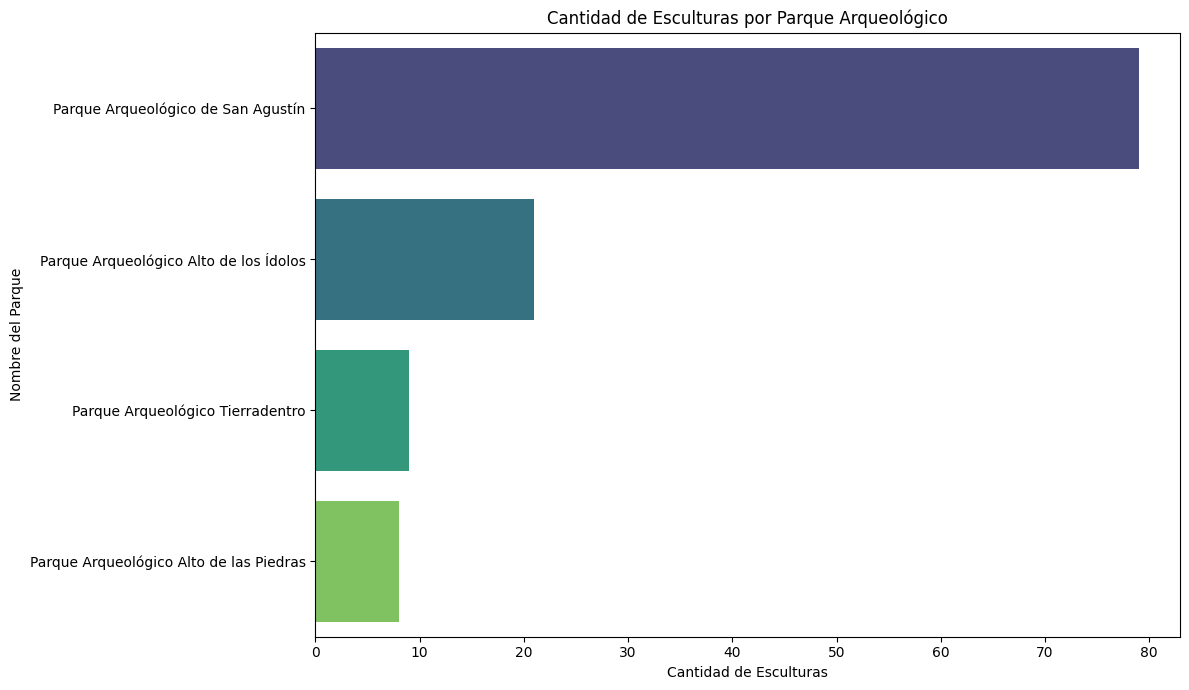

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la frecuencia de cada parque en la columna 'Nombre del Parque'
conteo_parques = data_filtrada['Nombre del Parque'].value_counts().reset_index()
conteo_parques.columns = ['Nombre del Parque', 'Cantidad de Esculturas']

# Crear el gráfico de barras
plt.figure(figsize=(12, 7))
sns.barplot(x='Cantidad de Esculturas', y='Nombre del Parque', data=conteo_parques, palette='viridis')
plt.title('Cantidad de Esculturas por Parque Arqueológico')
plt.xlabel('Cantidad de Esculturas')
plt.ylabel('Nombre del Parque')
plt.tight_layout()
plt.show()

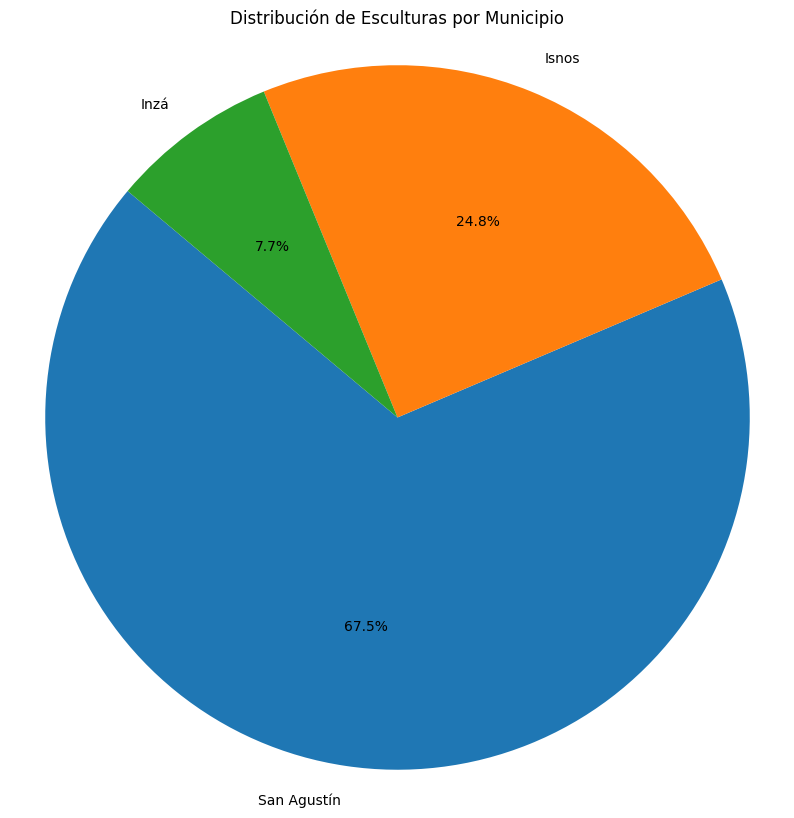

In [ ]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame con las columnas especificadas por el usuario
columnas_filtradas = ['Nombre del Municipio', 'Nombre del Parque']
data_filtrada_municipio = data[columnas_filtradas]

# Contar la frecuencia de cada municipio
conteo_municipios = data_filtrada_municipio['Nombre del Municipio'].value_counts()

# Crear el gráfico circular
plt.figure(figsize=(10, 10))
plt.pie(conteo_municipios, labels=conteo_municipios.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Esculturas por Municipio')
plt.axis('equal') # Asegura que el gráfico circular sea un círculo.
plt.show()

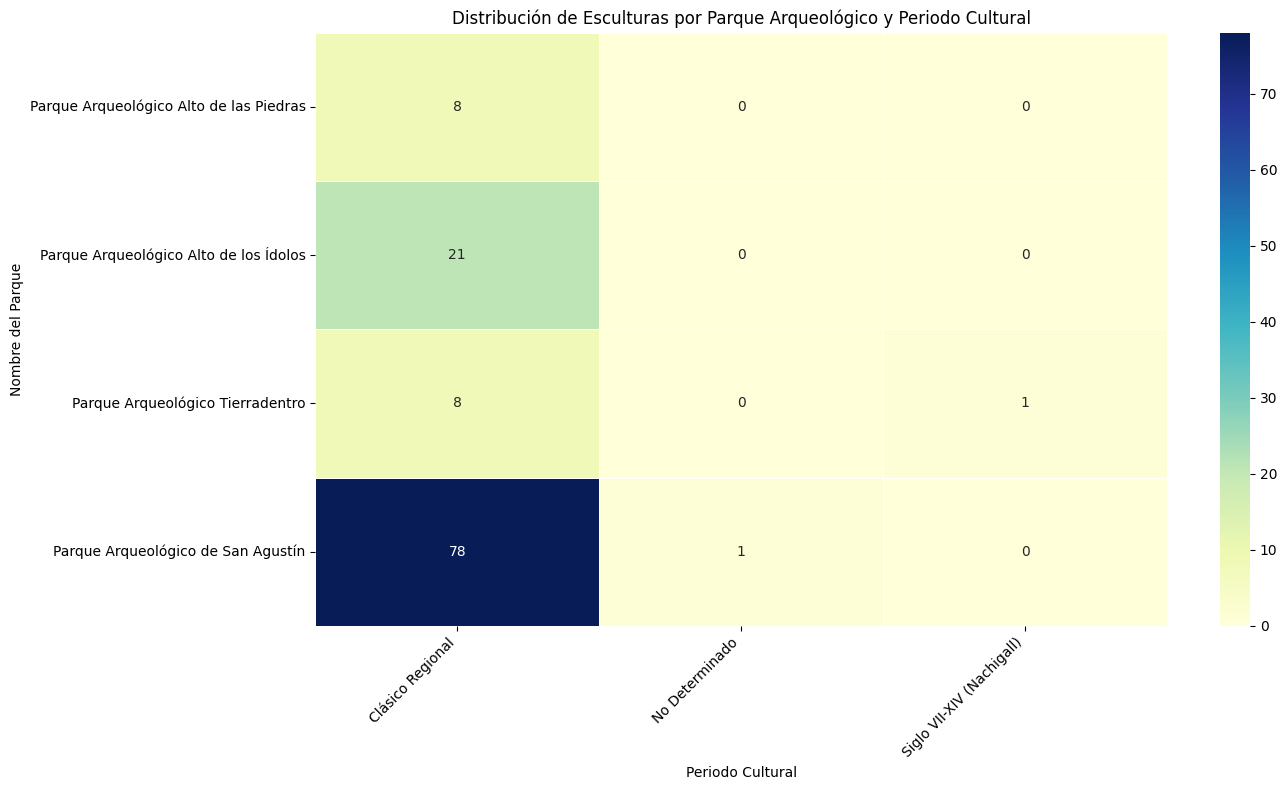

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la ocurrencia de cada combinación de Parque y Periodo Cultural
conteo_parque_periodo = data.groupby(['Nombre del Parque', 'Periodo Cultural']).size().unstack(fill_value=0)

# Crear el mapa de calor
plt.figure(figsize=(14, 8))
sns.heatmap(conteo_parque_periodo, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Distribución de Esculturas por Parque Arqueológico y Periodo Cultural')
plt.xlabel('Periodo Cultural')
plt.ylabel('Nombre del Parque')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()